<a href="https://colab.research.google.com/github/syou001/Data_Analysis/blob/main/Drinks_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

#<step1. 탐색> 데이터의 기초 정보 살펴보기

**[drinks 데이터셋의 기본 정보]**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#read_csv 함수로 데이터를 dataframe 형태로 불러온다.
path='/content/drive/MyDrive/수연/study/python-data-analysis/data/drinks.csv'
drink = pd.read_csv(path)

In [6]:
drink

country  beer_servings  ...  total_litres_of_pure_alcohol  continent
0    Afghanistan              0  ...                           0.0         AS
1        Albania             89  ...                           4.9         EU
2        Algeria             25  ...                           0.7         AF
3        Andorra            245  ...                          12.4         EU
4         Angola            217  ...                           5.9         AF
..           ...            ...  ...                           ...        ...
188    Venezuela            333  ...                           7.7         SA
189      Vietnam            111  ...                           2.0         AS
190        Yemen              6  ...                           0.1         AS
191       Zambia             32  ...                           2.5         AF
192     Zimbabwe             64  ...                           4.7         AF

[193 rows x 6 columns]

In [8]:
print(drink.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


In [11]:
drink.head()

country  beer_servings  ...  total_litres_of_pure_alcohol  continent
0  Afghanistan              0  ...                           0.0         AS
1      Albania             89  ...                           4.9         EU
2      Algeria             25  ...                           0.7         AF
3      Andorra            245  ...                          12.4         EU
4       Angola            217  ...                           5.9         AF

[5 rows x 6 columns]

In [12]:
drink.describe()

beer_servings  ...  total_litres_of_pure_alcohol
count     193.000000  ...                    193.000000
mean      106.160622  ...                      4.717098
std       101.143103  ...                      3.773298
min         0.000000  ...                      0.000000
25%        20.000000  ...                      1.300000
50%        76.000000  ...                      4.200000
75%       188.000000  ...                      7.200000
max       376.000000  ...                     14.400000

[8 rows x 4 columns]

#<step2. 인사이트의 발견>: 탐색과 시각화

**[피처간의 상관관계 탐색]**

[두 피처간의 상관계수 구하기]


*   여러개의 피처들의 서로간의 상관계수를 구하기 앞서, 두 피처간의 상관계수를 구하기



In [15]:
#'beer_servings', 'wine_servings' 두 피처간의 상관계수 계산한다.
#pearson은 상관계수를 구하는 계산 방법 중 하나를 의미, 가장 널리 쓰이는 방법임
corr = drink[['beer_servings', 'wine_servings']].corr(method='pearson')
print(corr)

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000




---



[여러 피처의 상관관계 분석]

In [17]:
drink.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [18]:
#피처간의 상관계수 행렬 구한다.
cols = ['beer_servings', 'spirit_servings', 'wine_servings',
        'total_litres_of_pure_alcohol']
corr = drink[cols].corr(method='pearson')
print(corr)

                              beer_servings  ...  total_litres_of_pure_alcohol
beer_servings                      1.000000  ...                      0.835839
spirit_servings                    0.458819  ...                      0.654968
wine_servings                      0.527172  ...                      0.667598
total_litres_of_pure_alcohol       0.835839  ...                      1.000000

[4 rows x 4 columns]




---



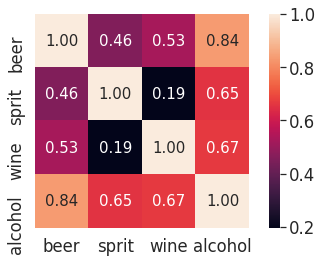

In [23]:
import seaborn as sns

#corr 행ㄹ렬 히트맵 시각화
cols_views=['beer', 'sprit', 'wine', 'alcohol']
#그래프 출력을위한 clos이름을 축약함.
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values, 
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws ={'size':15},
                 yticklabels=cols_views,
                 xticklabels=cols_views)
plt.tight_layout()
plt.show()

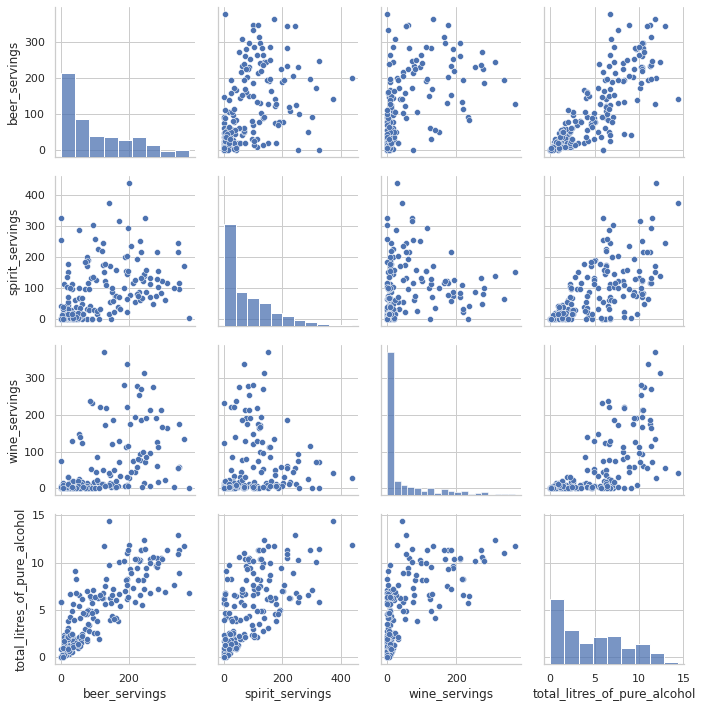

In [26]:
#시각화 라이브러리를 이용한 피처간의 scatter plot 출력
sns.set(style='whitegrid', context = 'notebook')
sns.pairplot(drink[['beer_servings', 'spirit_servings',
                     'wine_servings', 'total_litres_of_pure_alcohol']],height=2.5)
plt.show()

#<step3. 탐색적 분석>: 스무고개로 분석하는 개념적 탐색

[결측 데이터 전처리]


*   continent column에 대한 결측 데이터 처리 과정


In [31]:
drink.describe()
drink.isnull().sum()

beer_servings  ...  total_litres_of_pure_alcohol
count     193.000000  ...                    193.000000
mean      106.160622  ...                      4.717098
std       101.143103  ...                      3.773298
min         0.000000  ...                      0.000000
25%        20.000000  ...                      1.300000
50%        76.000000  ...                      4.200000
75%       188.000000  ...                      7.200000
max       376.000000  ...                     14.400000

[8 rows x 4 columns]

In [35]:
drink.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [40]:
#결측데이터를 처리한다 : 기타 대륙으로 통합 ->'OT'
drink['continent']=drink['continent'].fillna('OT')

In [46]:
drink.head(2)

country  beer_servings  ...  total_litres_of_pure_alcohol  continent
0  Afghanistan              0  ...                           0.0         AS
1      Albania             89  ...                           4.9         EU

[2 rows x 6 columns]



---



*파이차트 시각화*

In [47]:
labels = drink['continent'].value_counts()

In [ ]:
drink['continent'].unique()

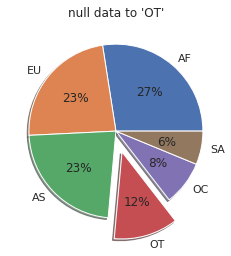

In [53]:
labels=drink['continent'].value_counts().index.tolist()
fracsl=drink['continent'].value_counts().values.tolist()
explode=(0, 0, 0, 0.25, 0, 0)

plt.pie(fracsl, explode=explode, labels=labels, autopct='%.0f%%',
        shadow=True)
plt.title('null data to \'OT\'')
plt.show()



---



**[그룹 단위의 데이터 분석 : 대륙별 분석]**

apply,agg 함수를 이용한 대륙별 분석

In [55]:
#대륙별 spirit_servings의 평균, 최소, 최대, 합계 계산
result = drink.groupby('continent').spirit_servings.agg(['mean','min', 'max','sum'])
result.head()

mean  min  max   sum
continent                            
AF          16.339623    0  152   866
AS          60.840909    0  326  2677
EU         132.555556    0  373  5965
OC          58.437500    0  254   935
OT         165.739130   68  438  3812

In [57]:
drink.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [59]:
#전체 평균보다 많은 알코올을 섭취하는 대륙을 구한다.
total_mean = drink.total_litres_of_pure_alcohol.mean()
continent_mean=drink.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean = continent_mean[continent_mean >= total_mean]
print(continent_over_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [60]:
#평균 beer_servings이 가장 높은 대륙 구한다.
beer_continent = drink.groupby('continent').beer_servings.mean().idxmax()
print(beer_continent)

EU




---



**분석 결과에 대한 시각화**

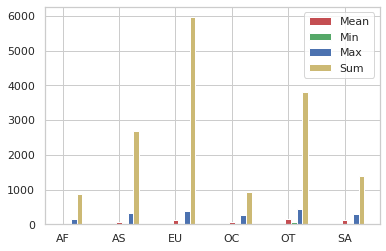

In [61]:
#continent별로 spirit_servings의 평균, 최소, 최대, 합계 시각화
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()
 
index = np.arange(n_groups)
bar_width = 0.1
 
rects1 = plt.bar(index, means, bar_width,
                 color='r',
                 label='Mean')
 
rects2 = plt.bar(index + bar_width, mins, bar_width,
                 color='g',
                 label='Min')

rects3 = plt.bar(index + bar_width * 2, maxs, bar_width,
                 color='b',
                 label='Max')
 
rects3 = plt.bar(index + bar_width * 3, sums, bar_width,
                 color='y',
                 label='Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

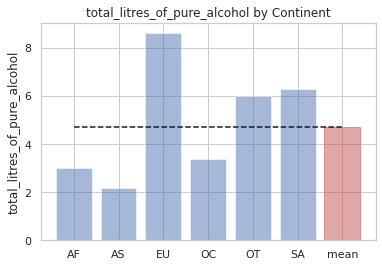

In [62]:
# continent별로 total_litres_of_pure_alcohol을 시각화
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)
 
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('r')
plt.plot([0., 6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

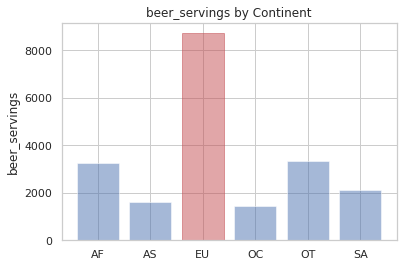

In [64]:
# continent별로 beer_servings을 시각화
beer_group = drink.groupby('continent')['beer_servings'].sum()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_group.tolist()
 
bar_list = plt.bar(y_pos, alcohol, align='center', alpha=0.5)
bar_list[continents.index("EU")].set_color('r')
plt.xticks(y_pos, continents)
plt.ylabel('beer_servings')
plt.title('beer_servings by Continent')
 
plt.show()

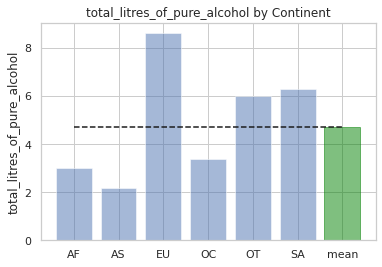

In [65]:
#그래프 색상을 변경
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)
 
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
#색상을 설정하는 부분
bar_list[len(continents) - 1].set_color('green')
plt.plot([0., 6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

#<step4. 통계적 분석>: 분석 대상간의 통계적 차이 검정

**[아프리카와 유럽간의 맥주 소비량 차이 검정]**

In [68]:
#아프리카와 유럽간의 맥주 소비량 차이를 검정
from scipy import stats
africa = drink.loc[drink['continent']=='AF']
europe = drink.loc[drink['continent']=='EU']


tTestResult = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])
tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'], equal_var=False)

print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f" % tTestResultDiffVar)

The t-statistic and p-value assuming equal variances is -7.268 and 0.000.
The t-statistic and p-value not assuming equal variances is -7.144 and 0.000




---



#대한민국은 얼마나 술을 독하게 마시는 나라일까?

In [75]:
#total_servings 피처 생성
drink['total_servings'] = drink['beer_servings'] + drink['wine_servings']+drink['spirit_servings']

#술 소비량 대비 알콜 비율 피처 생성
drink['alcohol_rate'] = drink['total_litres_of_pure_alcohol']/drink['total_servings']
drink['alcohol_rate']=drink['alcohol_rate'].fillna(0)

#순위 정보 생성
country_with_rank = drink[['country','alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by=['alcohol_rate'],
                                                  ascending=0)
country_with_rank.head(5)

country  alcohol_rate
63         Gambia      0.266667
153  Sierra Leone      0.223333
124       Nigeria      0.185714
179        Uganda      0.153704
142        Rwanda      0.151111

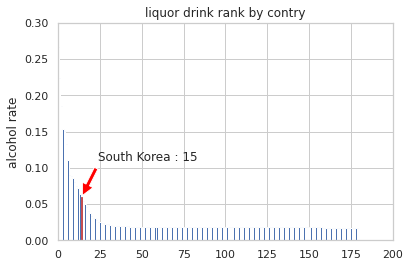

In [76]:
#국가별 순위 정보 그래프로 시각화
country_list = country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.tolist()
 
bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by contry')
plt.axis([0, 200, 0, 0.3])

korea_rank = country_list.index("South Korea")
korea_alc_rate = country_with_rank[country_with_rank['country'] == 'South Korea']['alcohol_rate'].values[0]
plt.annotate('South Korea : ' + str(korea_rank + 1), 
             xy=(korea_rank, korea_alc_rate), 
             xytext=(korea_rank + 10, korea_alc_rate + 0.05),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()